In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [10]:
dataset = pd.read_excel("C:/Users/as316/AppData/Local/Programs/Python/Python310/Scripts/.ipynb_checkpoints/Superstore_USA.xlsx")


In [73]:
pd.set_option("display.max_columns",24)

In [74]:
dataset.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,...,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,...,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,...,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522,2010
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,...,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523,2011
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,...,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523,2011
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,...,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523,2011


In [13]:
dataset.shape

(9426, 24)

In [17]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)

C:\Users\as316\AppData\Local\Temp\ipykernel_25500\1238975681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace=True)


In [61]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Order Year              0
dtype: int64

# Profit

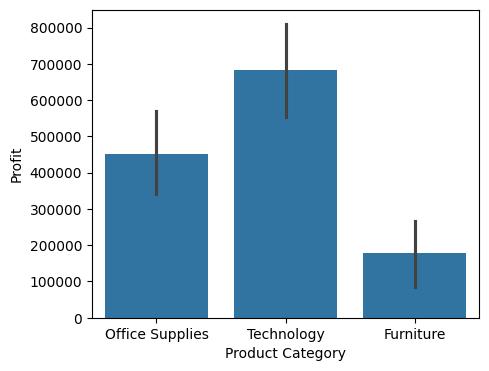

In [66]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category', y='Profit',data=dataset,estimator='sum')
plt.show()

In [ ]:
# technology product category is generating most profit

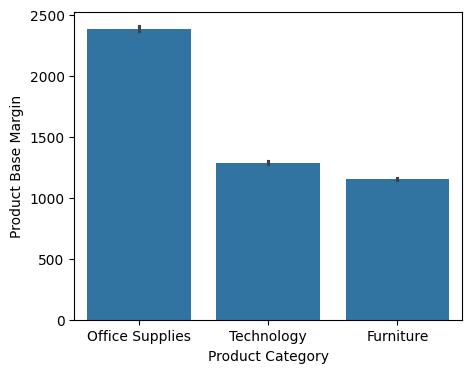

In [75]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category', y='Product Base Margin',data=dataset,estimator='sum')
plt.show()

In [ ]:
# office supplies has product base margin

# State

In [72]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Order Year

In [60]:
dataset['Order Year']=dataset['Order Date'].dt.year

In [62]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

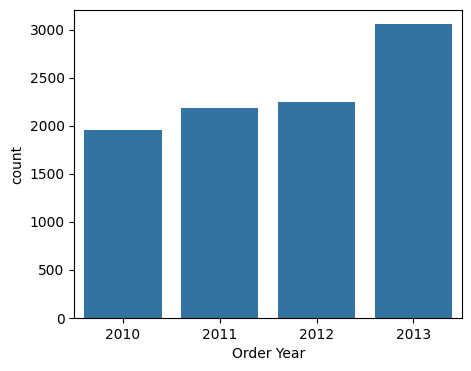

In [64]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Year",data=dataset)
plt.show()

In [ ]:
# In 2023, we received the highest number of orders, indicating a significant surge in demand and potentially reflecting successful 
#  marketing strategies or increased consumer interest in our products.

# Product Category

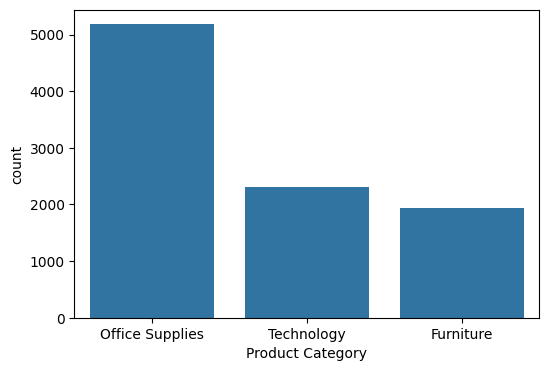

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category",data=dataset)
plt.show()

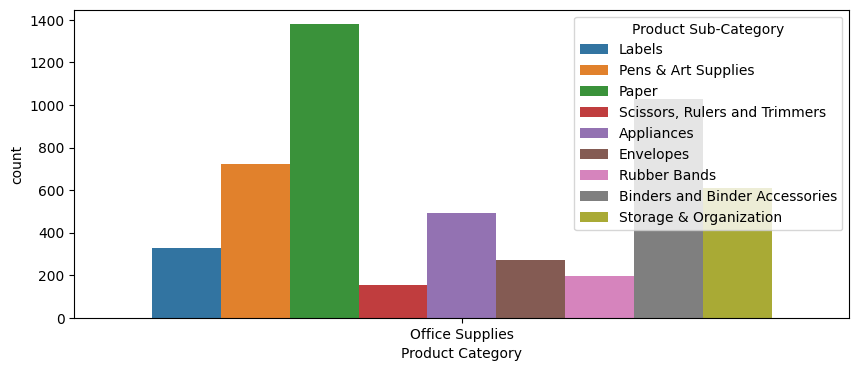

In [55]:
plt.figure(figsize=(10,4))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.show()

# Customer Segment

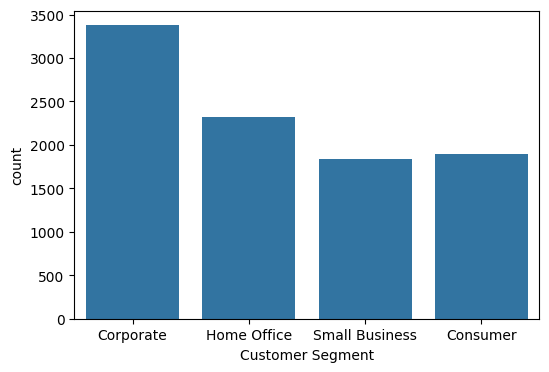

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)
plt.show()

# Ship Mode

In [34]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [38]:
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values

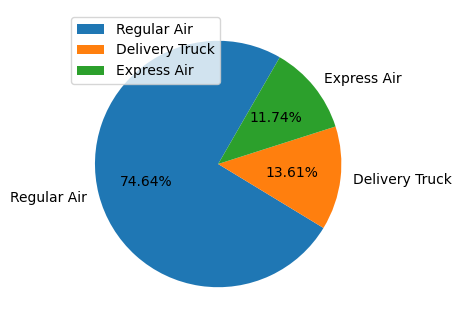

In [45]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

In [ ]:
# Engaging in discussions with airlines for potential cost-saving measures or partnership opportunities could be a strategic move

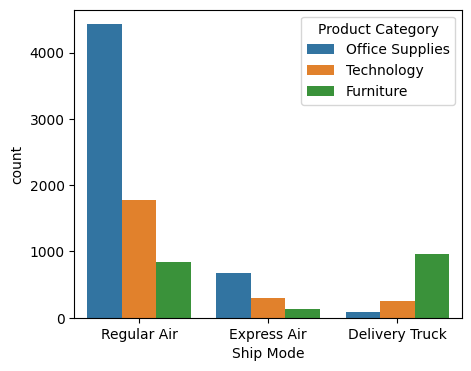

In [48]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

# Order Priority

In [27]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [25]:
#dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [26]:
#dataset['Order Priority']=dataset['Order Priority'].replace("Critical ","Critical")

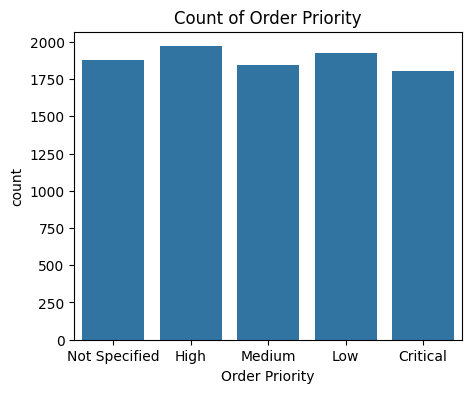

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()